In [1]:
############importing libraries#############
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
import datetime as dt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from  matplotlib import pyplot
%matplotlib inline

In [2]:
############working directory#################
os.chdir("C:/Users/chandini c/Desktop")
os.getcwd()

'C:\\Users\\chandini c\\Desktop'

In [3]:
############Read the csv file################
day = pd.read_csv("day.csv")

In [4]:
###########shape of train and test data#########
day.shape

(731, 16)

In [5]:
############observing data#################
day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
############checking datatypes#############
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Exploratory Data Analysis

In [7]:
############exploratory data analysis#######################
day['season']= day['season'].astype('category')
day['yr']=day['yr'].astype('int')
day['mnth']=day['mnth'].astype('category')
day['holiday']=day['holiday'].astype('int')
day['workingday']=day['workingday'].astype('int')
day['weekday']=day['weekday'].astype('category')
day['weathersit']=day['weathersit'].astype('category')
d1=day['dteday'].copy()
for i in range (0,d1.shape[0]):
    d1[i]=dt.datetime.strptime(d1[i], '%Y-%m-%d').strftime('%d')
day['dteday']=d1
day['dteday']=day['dteday'].astype('category')
day = day.drop(['instant','casual', 'registered'], axis=1)

In [8]:
day.dtypes

dteday        category
season        category
yr               int32
mnth          category
holiday          int32
weekday       category
workingday       int32
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
cnt              int64
dtype: object

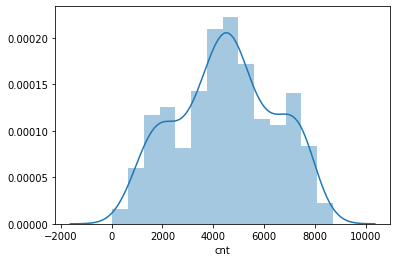

In [9]:
############target variable analysis############
day['cnt'].describe()
############check whether it is normally distributed###########
sns.distplot(day['cnt']);

Distribution of Numerical Variables


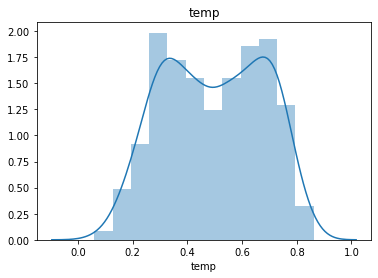

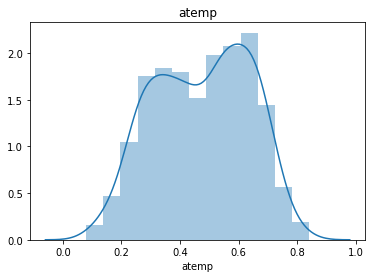

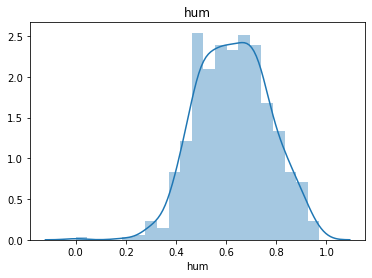

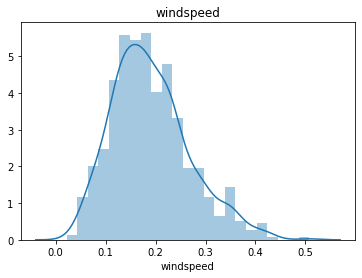

In [10]:
#############distribution of independent numerical varaibles#############
numerical_feature=['temp','atemp','hum','windspeed']
print("Distribution of Numerical Variables")
for i,col in enumerate(numerical_feature):
    plt.subplots(1)
    sns.distplot(day[col]);
    plt.title(col)

mnth
1     62
2     57
3     62
4     60
5     62
6     60
7     62
8     62
9     60
10    62
11    60
12    62
dtype: int64


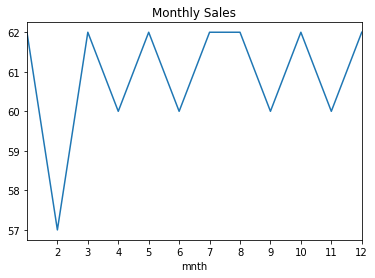

In [11]:
#Bike Rentals Monthly
sales_by_month = day.groupby('mnth').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(range(1,12)))


season
1    181
2    184
3    188
4    178
dtype: int64


Text(0, 0.5, 'Total BIkes Rented')

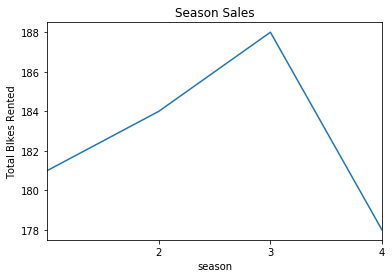

In [12]:
#Sales by Season
sales_by_season = day.groupby('season').size()
print(sales_by_season)
plot_by_day = sales_by_season.plot(title='Season Sales',xticks=(range(1,4)))
plot_by_day.set_xlabel('season')
plot_by_day.set_ylabel('Total BIkes Rented')

# Bivariate relationship between the numerical varaible and target variable

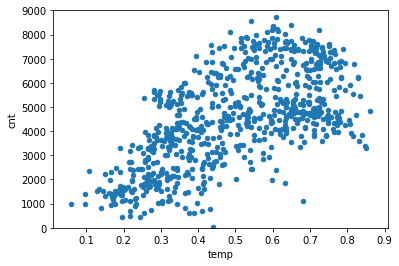

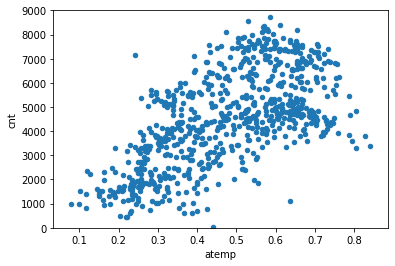

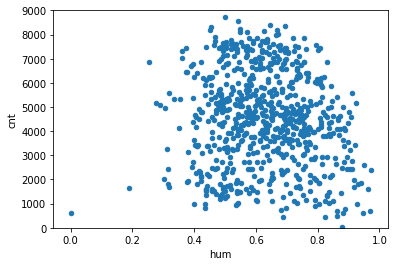

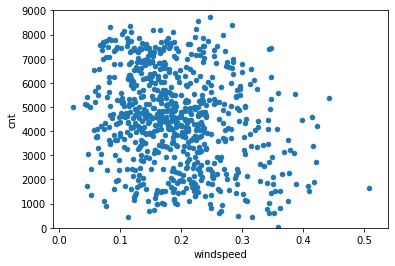

In [13]:

#############relation between numerical variable 'temp' and target variable 'cnt'###########
day['cnt'].value_counts()
##draw scatter plot between numerical variable 'temp' and target variable 'cnt'##
var='temp'
df=pd.concat([day['cnt'],day[var]],axis=1)
df.plot.scatter(x=var,y='cnt',ylim=(0,9000));
#there is a good relationship between 'temp' and 'cnt'

#############relation between numerical variable 'atemp' and target variable 'cnt'###########
day['cnt'].value_counts()
##draw scatter plot between numerical variable 'atemp' and target variable 'cnt'##
var='atemp'
df=pd.concat([day['cnt'],day[var]],axis=1)
df.plot.scatter(x=var,y='cnt',ylim=(0,9000));


#############relation between numerical variable 'hum' and target variable 'cnt'###########
day['cnt'].value_counts()
##draw scatter plot between numerical variable 'atemp' and target variable 'cnt'##
var='hum'
df=pd.concat([day['cnt'],day[var]],axis=1)
df.plot.scatter(x=var,y='cnt',ylim=(0,9000));

#############relation between numerical variable 'windspeed' and target variable 'cnt'###########
day['cnt'].value_counts()
##draw scatter plot between numerical variable 'windspeed' and target variable 'cnt'##
var='windspeed'
df=pd.concat([day['cnt'],day[var]],axis=1)
df.plot.scatter(x=var,y='cnt',ylim=(0,9000));

# Missing Value Analysis

In [14]:
#Check if there are missing values
day.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

# Outlier Analysis

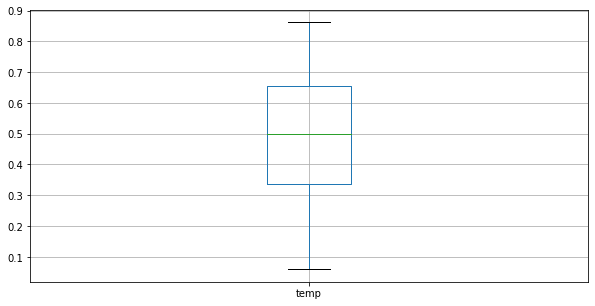

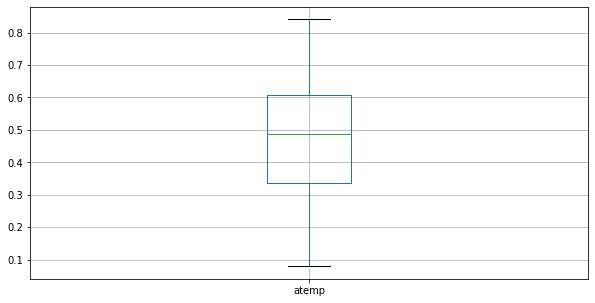

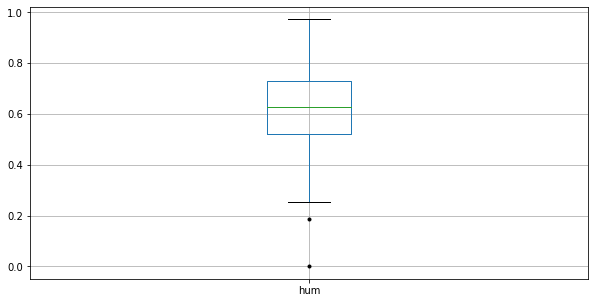

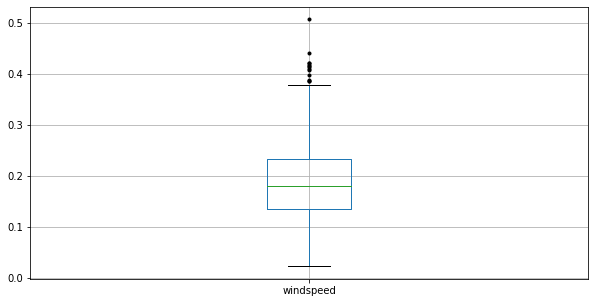

In [15]:
#############displaying a boxplot for numerical variables before removal of outliers##############
for i in numerical_feature:
    plt.show(day.boxplot(column = i, sym='k.', figsize=(10,5)))

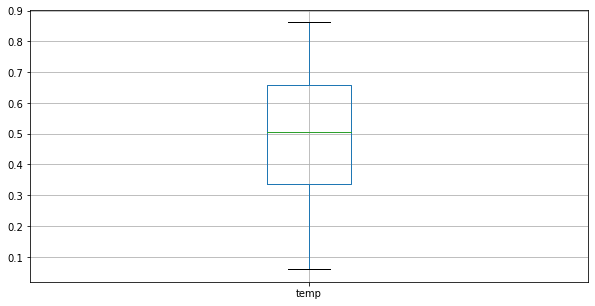

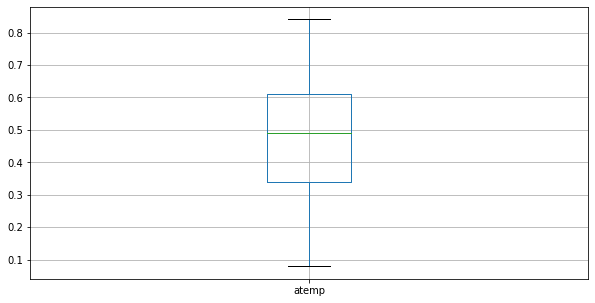

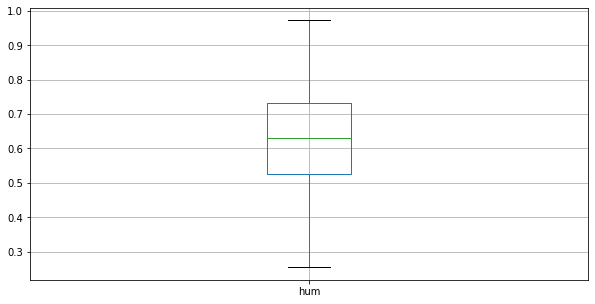

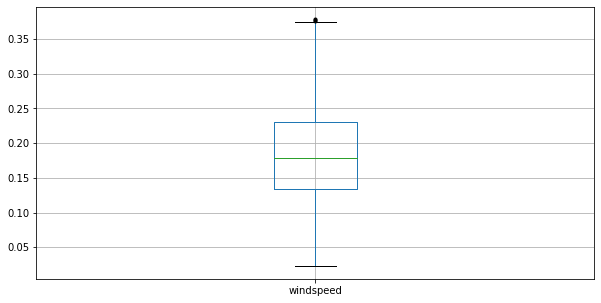

In [16]:
#################after analysis we can say that variables 'hum' and 'windspeed' has outliers#####################
############Removal Of Outliers#############
#outliers in each variable in train data 
train_outliers = dict()
for col in [col for col in numerical_feature]:
    q75,q25=np.percentile(day.loc[:,col],[75,25])
    Q=q75-q25
    min=q25-(Q*1.5)
    max=q75+(Q*1.5)
    #print(min)
    #print(max)
    day=day.drop(day[day.loc[:,col]<min].index)
    day=day.drop(day[day.loc[:,col]>max].index)
    
# displaying a boxplot for numerical variables after removal of outliers
for i in numerical_feature:
    plt.show(day.boxplot(column = i, sym='k.', figsize=(10,5)))

# Feature Selection

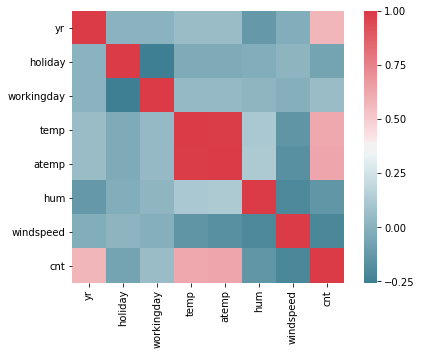

In [17]:
#################Correlation Analysis#######################
dfcorr=day
#dfcorr.shape
f,ax=plt.subplots(figsize=(7,5))
corr=dfcorr.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

#as per the correlation graph there is a strong relation between variables 'temp' and 'atemp'

C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


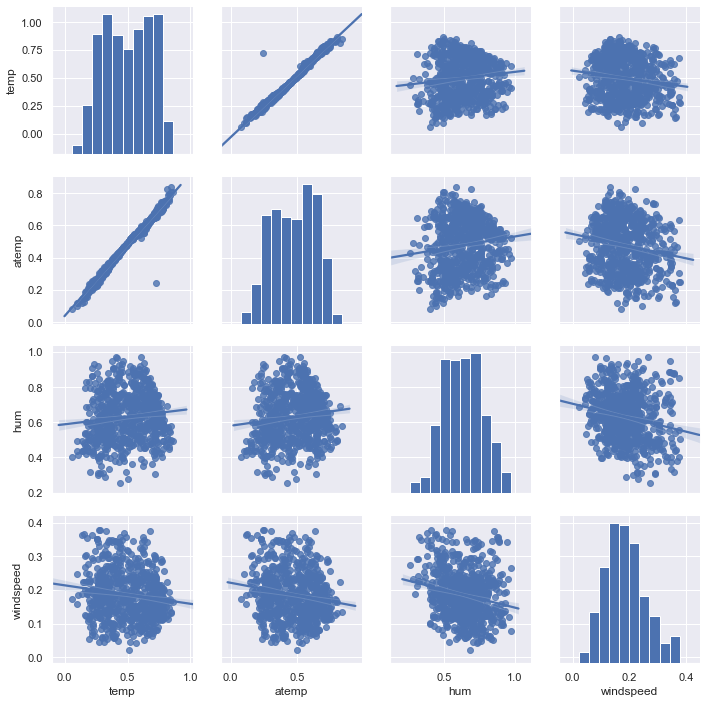

In [18]:
#####################check realtionship with scatter plots##########################
sns.set()
sns.pairplot(day[numerical_feature],size=2.5,kind='reg')
plt.show();

#as per the scatter plots there is poor relation between 'hum' and 'cnt'
#there is a poor relation between 'windspeed' and 'cnt'

In [19]:
#Chi Square Test of Independence
#Saving Categorical Numbers
cat_names = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
from scipy.stats import chi2_contingency
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(day['cnt'], day[i]))
    print(p)

season
0.5545167305842608
yr
0.38695146266459124
mnth
0.4781836629471889
holiday
0.6894222691289755
weekday
0.4016886631376554
workingday
0.47588540831249254
weathersit
0.520434698546695


In [20]:
#as 'temp' and 'atemp' are highly correlated we can drop 'atemp'
#poor realtion between 'hum' and 'cnt'
#'holiday' does not contribute much to the independent variable.
day = day.drop(['atemp','hum','holiday'], axis=1)

# Modeling

In [31]:
#Divide data into train and test
train, test = train_test_split(day, test_size=0.2)

In [32]:
#############################################Linear Regression#################################################
#implement linear regression algorithm on train data
lr_model = sm.OLS(train.iloc[:,9].astype(float), train.iloc[:,0:9].astype(float)).fit()

#Check the summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1742.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):                        0.00
Time:                        15:44:47   Log-Likelihood:                         -4718.4
No. Observations:                 573   AIC:                                      9455.
Df Residuals:                     564   BIC:                                      9494.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dteday        -2.8026      4.141     -0.677      0.499     -10.936       5.331
season       561.8430     61.673      9.110      0.000     440.707     682.979
yr          2225.9487     75.983     29.295      0.000    2076.704    2375.194
mnth         -43.2138     19.228     -2.247      0.025     -80.982      -5.446
weekday       84.2160     19.055      4.420      0.000      46.788     121.644
workingday   356.7127     82.764      4.310      0.000     194.148     519.277
weathersit  -608.8183     65.787     -9.254      0.000    -738.035    -479.601
temp        5513.5248    205.926     26.774      0.000    5109.049    5918.000
windspeed   -523.0959    470.729     -1.111      0.267   -1447.693     401.501
==============================================================================
Omnibus:                       99.442   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.645
Skew:                          -0.915   Prob(JB):                     8.24e-51
Kurtosis:                       5.512   Cond. No.                         243.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#Predict the results of test data
lr_pred = lr_model.predict(test.iloc[:,0:9].astype(float))

In [34]:
######Error Metrics-Linear Regression######

#defining MAPE function
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
mape_lr=MAPE(test.iloc[:,9],lr_pred)
print('mape:',mape_lr)

# Calculate and display accuracy
accuracy = 100 - mape_lr
print('Accuracy:', round(accuracy, 2), '%.')

mape: 17.30039848313548
Accuracy: 82.7 %.


In [35]:
#MAPE=17.3003
#Accuracy=82.7%
#Adj. R-Squared=0.965
#F-stat=1742

In [36]:
######linear regression###########
#Create continuous data. Save target variable first
train_lr = train[['cnt','temp','windspeed']]
test_lr = test[['cnt','temp','windspeed']]

In [37]:
##Create dummies for categorical variables
cat_names = ["season", "yr", "mnth", "weekday", "workingday", "weathersit"]

for i in cat_names:
    temp1 = pd.get_dummies(train[i], prefix = i)
    temp2 = pd.get_dummies(test[i], prefix = i)
    train_lr = train_lr.join(temp1)
    test_lr = test_lr.join(temp2)

In [38]:
#Train the model
lr_model = sm.OLS(train_lr.iloc[:,0].astype(float), train_lr.iloc[:,1:34].astype(float)).fit()

#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     111.2
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          4.89e-199
Time:                        15:45:42   Log-Likelihood:                -4627.2
No. Observations:                 573   AIC:                             9308.
Df Residuals:                     546   BIC:                             9426.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
temp          3860.9454    462.766      8.343      0.000    2951.926    4769.965
windspeed    -2229.1193    488.961     -4.559      0.000   -3189.594   -1268.645
season_1      -519.8040    133.977     -3.880      0.000    -782.977    -256.631
season_2       354.8608    137.713      2.577      0.010      84.349     625.373
season_3       416.3373    154.416      2.696      0.007     113.016     719.659
season_4       926.0878    146.314      6.329      0.000     638.680    1213.495
yr_0          -469.0606     77.359     -6.063      0.000    -621.017    -317.104
yr_1          1646.5425     83.562     19.704      0.000    1482.400    1810.685
mnth_1        -313.8769    199.225     -1.575      0.116    -705.219      77.465
mnth_2         -53.9096    191.739     -0.281      0.779    -430.546     322.727
mnth_3         216.1108    141.304      1.529      0.127     -61.456     493.678
mnth_4         257.0570    173.982      1.477      0.140     -84.700     598.814
mnth_5         490.6886    183.797      2.670      0.008     129.654     851.723
mnth_6         253.4527    180.622      1.403      0.161    -101.347     608.252
mnth_7        -236.8729    217.988     -1.087      0.278    -665.070     191.324
mnth_8         178.7297    201.873      0.885      0.376    -217.813     575.272
mnth_9         656.4134    163.758      4.008      0.000     334.740     978.086
mnth_10        415.7789    178.987      2.323      0.021      64.192     767.366
mnth_11       -305.4926    189.011     -1.616      0.107    -676.771      65.786
mnth_12       -380.5971    157.813     -2.412      0.016    -690.593     -70.602
weekday_0      501.9881    162.337      3.092      0.002     183.106     820.870
weekday_1     -203.0670     94.573     -2.147      0.032    -388.839     -17.295
weekday_2      -94.2584    107.535     -0.877      0.381    -305.492     116.975
weekday_3       39.4852    106.043      0.372      0.710    -168.817     247.788
weekday_4       48.0776    107.062      0.449      0.654    -162.227     258.382
weekday_5       91.0285    105.369      0.864      0.388    -115.949     298.006
weekday_6      794.2281    162.330      4.893      0.000     475.360    1113.096
workingday_0   192.3336    138.788      1.386      0.166     -80.290     464.957
workingday_1   985.1483    113.366      8.690      0.000     762.462    1207.834
weathersit_1  1448.5649     80.733     17.943      0.000    1289.979    1607.151
weathersit_2   701.5987     82.866      8.467      0.000     538.823     864.374
weathersit_3  -972.6817    156.170     -6.228      0.000   -1279.449    -665.914
==============================================================================
Omnibus:                      117.733   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.889
Skew:      

In [39]:
#Predict the results of test data
lr_predictions = lr_model.predict(test_lr.iloc[:,1:34])

In [40]:
######Error Metrics-Linear Regression######
mape_lr=MAPE(test.iloc[:,9],lr_predictions)
print('mape:',mape_lr)

# Calculate and display accuracy
accuracy = 100 - mape_lr
print('Accuracy:', round(accuracy, 2), '%.')

mape: 14.205595259690028
Accuracy: 85.79 %.


In [41]:
#Adj. R-squared=0.834
#F-statistic=111.5
#MAPE=14.2055
#Accuracy=85.79%

In [42]:
#####################################Decision Tree Regression###############################################
#implement decision tree algorithm on train data
dt=DecisionTreeRegressor()
dt_model=dt.fit(train.iloc[:,0:9],train.iloc[:,9])

#Apply model on test data
dt_pred=dt_model.predict(test.iloc[:,0:9])

In [43]:
######Error Metrics-Decision Tree Regression######
mape_dt=MAPE(test.iloc[:,9],dt_pred)
print('mape:',mape_dt)

# Calculate and display accuracy
accuracy = 100-mape_dt
print('Accuracy:', round(accuracy, 2), '%.')

mape: 17.349832518637033
Accuracy: 82.65 %.


In [44]:
#mape=17.3498
#Accuracy=82.65 %.

In [45]:
##########################################Random Forest Regression#############################################
#implement random forest algorithm on train data
rf = RandomForestRegressor(n_estimators=500,random_state=123)
rf_model=rf.fit(train.iloc[:,0:9],train.iloc[:,9])

#Apply model on test data
rf_pred=rf_model.predict(test.iloc[:,0:9])

In [46]:
######Error Metrics-Random Forest Regression######
mape_rf=MAPE(test.iloc[:,9],rf_pred)
print('mape:',mape_rf)

# Calculate and display accuracy
accuracy = 100 - mape_rf
print('Accuracy:', round(accuracy, 2), '%.')

mape: 12.309897080660075
Accuracy: 87.69 %.


In [47]:
#mape=12.309897
#Accuracy=87.69 %.

In [48]:
#Create a dataframe for actual values and predicted values
df_rf = pd.DataFrame({'actual': test.iloc[:,9], 'pred': rf_pred})
df_rf.to_csv('submission_rf.csv',index=False)
df_rf.head()

,actual,pred
250,1842,2558.330
481,5026,5260.516
411,3005,3838.362
610,5810,6830.236
264,4795,3807.022
